<p>Objective: To explore fast and intuitive visualization techniques for EDA (exploratory data analysis) using Matplotlib and Seaborn.</p>

<p style="color:#666666">Last updated: 15th Apr 2017<br>Akshay Sehgal, www.asehgal.com</p>

# 1. Introduction

I was always facinated by the visualizations which are posted on the kaggle kernel feed almost every hour. I found it quite difficult to decide where to begin due to the vast number of library options and functions. This forced me to keep looking for a standardized way for creating visualizations. I decided to go with Matplotlib and Seaborn which are not only is popular (meaning I could find lots of material to learn them) but also customizable enough for me to experiment with. I have been exploring these for quite some time now and this notebook is a structured summarization of what I learnt and retained. 

<b>Please note - I am in no way a visualization expert. Only a data scientist looking for <u>fast and intuitive methods</u> to add charts to my analysis for better understanding of the data (Not to forget the visual appeal they add for the reader). Following method explained should let you chart out almost every basic permutation of visualizations needed to explore data using the same set of steps throughout.</b>

Following is the list for the visualizations which are explained. This list is still growing!
<ul>
<li><b>Frequency Distributions</b> : sns.countplot</li>
<li><b>Histograms</b> : plt.hist</li>
<li><b>Bar Charts</b> : sns.barplot</li>
<li><b>Scatter Plots</b> : plt.scatter, sns.jointplot</li>
<li><b>Box Plots</b> : sns.boxplot</li>
<li><b>Density Distributions</b> : sns.violinplot</li>
<li><b>Line Charts</b> : sns.kdeplot</li>
<li><b>Correlation Matrix</b> : sns.pairplot</li>
</ul>

The data I will use is the classic Titanic dataset which almost every kaggler knows by heart.

In [1]:
#Set Work Directory
# import os
# os.chdir('C:\\Users\\Akshay\\Documents\\iPython\\Personal\\Practice')
# os.getcwd()

#Call Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data
# df = pd.read_excel('titanic.xls')
df = pd.read_csv('titanic.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# 2. The artist's canvas

Before we start plotting the charts, its important to have a 'canvas' to draw on. This is the FacetGrid method from Seaborn library. Quite simply, think about it as the chart area (and its properties) from a powerpoint chart. FacetGrid is a VERY powerful method to add dimentionality to your visualization, without having to run groupby codes before plotting.

FacetGrid has 2 stages - 

<b>Step 1 - The canvas</b>
1. Imagine the canvas like a grid of charts. The grid has rows and columns. Each cell can be a chart here.
1. First you need to define the dataset you want to use. In this case df.
3. Next you define the rows and columns for this spreadsheet of charts. <u>These are not the x and y of the chart. Rather x and y of the grid of charts.</u>
3. You can also define a fourth variable which is depth or Hue (more about this later).
4. Finally other properties such as size of the charts is defined as well.

<b>Step 2 - The drawing</b>
1. Imagine this as the actual 'drawing'.
1. First you define what the drawing is. It can be any of the above chart types.
2. Next you define what variables to use and all properties of the chart such as opacity etc.
3. More about step 2 in following sections.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


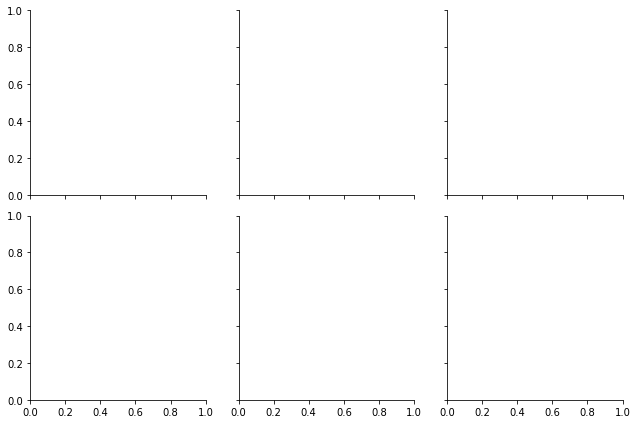

In [3]:
#Example of blank canvas (step 1 only)
## Sex has 2 values, while pclass has 3 values. Thus you get a 2 X 3 matrix of charts
g = sns.FacetGrid(df, row='Sex', col='Pclass',hue='Pclass',size=3)

# 3. Visualizations

This section will cover the various types of plots mentioned above. I have tried using different chart functions from Matplotlib and Seaborn for a chart type but feel free to use chart functions from other libraries as well.

## 3.1 Frequency distributions

Frequency distributions are probably the most commonly used diagrams for quick view of categorical variables with low cardinality (less number of levels). Viewing these is very useful to understand how biased data is by a particular category.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use sns.countplot along with the variable you want to view.

This lets you skip the .value_counts() method unless you really need it for processing.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


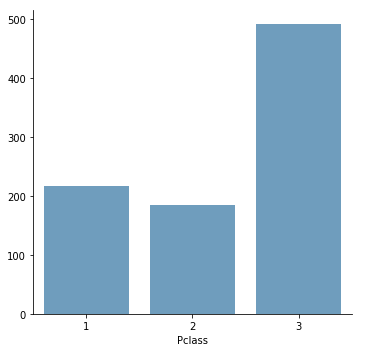

In [4]:
#First example is a single 1X1 grid chart, without any rows, columns or depth.
#This is why i dont mention any row or column or hue in the FacetGrid statement.
g = sns.FacetGrid(df,size=5)

#Next is the drawing itself. I need a frequency distribution of the Pclass. Opacity = 70%
g.map(sns.countplot,'Pclass', alpha=0.7)

#General hygiene of adding legends.
g.add_legend()

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


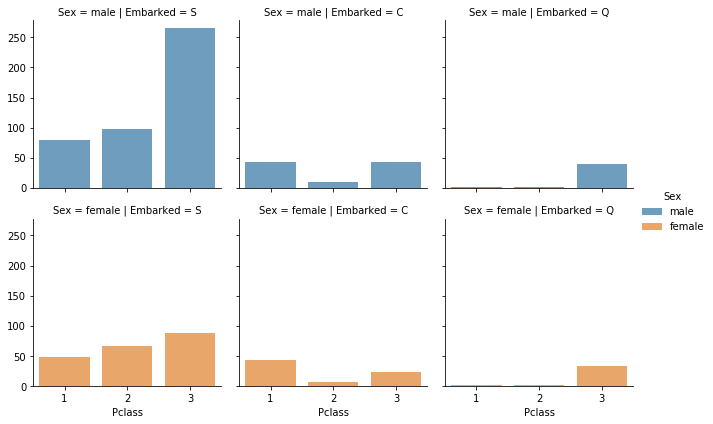

In [5]:
#In second example I make a 2X3 grid with Gender levels as Rows and Embarking levels as columns. 
#Hue (Depth, color) is gender as well. Chart screen size is 3 
g = sns.FacetGrid(df,row='Sex',col='Embarked',hue='Sex',size=3)

#Frequency distribution is that of number of passengers in each passenger class. Opacity is 70%
g.map(sns.countplot,'Pclass', alpha=0.7)

#General hygiene of adding legends
g.add_legend()

## 3.2 Histograms

Histograms are used to understand how a continous variable is represented in the data. This lets you see how skewed your data is and gives you a measure of its central tendencies.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use plt.hist along with the variable you want to view.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


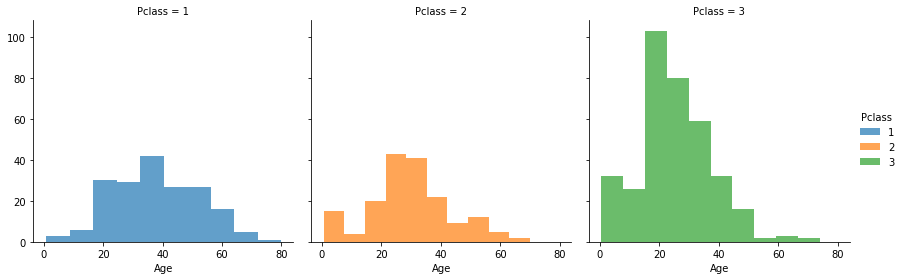

In [6]:
#Grid is 1X3 with only pclass as columns. Hue(depth) is same as columns for color only.
g = sns.FacetGrid(df,col='Pclass',hue='Pclass',size=4)
g.map(plt.hist,'Age',alpha=0.7)
g.add_legend()

## 3.3 Bar Charts

Bar charts help you to visualize categorical data against a continous variable. This is a standard bivariate analysis chart type.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use sns.barplot along with the variables you want to view. First variable (x) is the categorical, while second (y) is the continous.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Shakib\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


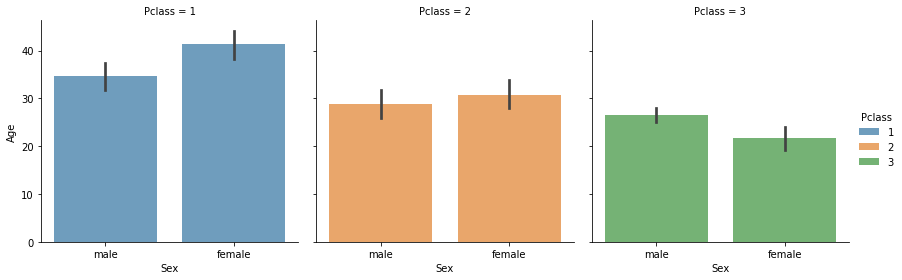

In [7]:
#Grid is 1X3 with only pclass as columns. Hue(depth) is same as columns for color only.
g = sns.FacetGrid(df,col='Pclass',hue='Pclass',size=4)
g.map(sns.barplot,'Sex','Age',alpha=0.7)
g.add_legend()

## 3.4 Scatter Plots

Scatter plots are used to view variation between 2 continous variables. They help in detecting outliers and estimating correlation between the variables.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use plt.scatter along with the variables you want to view. Both x and y must be continous ofcourse.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


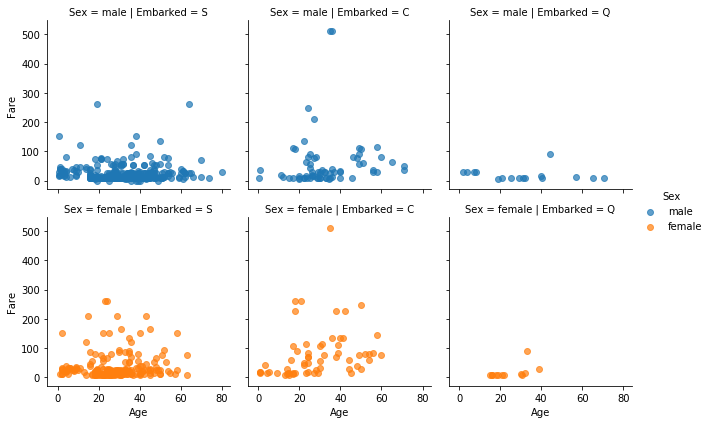

In [8]:
#Grid is 2X3 with Embarked levels as columns and Gender levels as rows. Hue(depth) is same as rows for color only.
g = sns.FacetGrid(df, row='Sex',col='Embarked',hue='Sex',size=3)
g.map(plt.scatter,'Age','Fare', alpha=0.7)
g.add_legend()

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


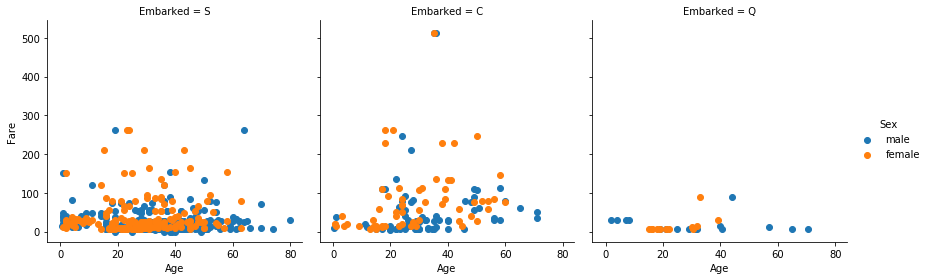

In [9]:
#Grid is 1X3 with embarked levels as columns. Hue is gender levels for color.
g = sns.FacetGrid(df,col='Embarked',hue='Sex', size=4)
g.map(plt.scatter, 'Age', 'Fare')
g.add_legend()

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


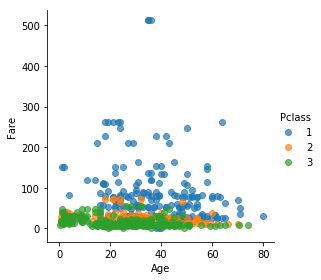

In [10]:
#Grid is 1X1 with hue as pclass
g = sns.FacetGrid(df,hue='Pclass',size=4)
g.map(plt.scatter,'Age','Fare', alpha=0.7)
g.add_legend()

<p><b>Jointplot - A cooler scatter plot</b></p>
<p>Another cool way of drawing a scatter plot is using the sns.jointplot method. This is not a grid technique but lets you get correlation values as well as frequency plots for the variables associated. The syntax is only slightly different.</p>

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


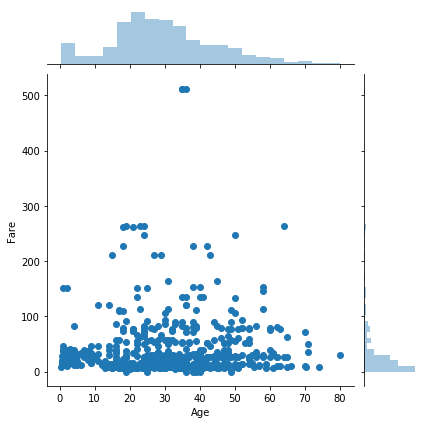

In [11]:
#Non Grid method for scatter plot with bonus correlation and freq distributions
sns.jointplot(x='Age', y='Fare', data=df, size=6)

## 3.5 Box Plots

Box plots are best used to understand variation of a single variable in terms of percentile. They are best compared in groups across levels of a categorical variable.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use sns.boxplot along with the variables you want to view. In this case, the box plot is that of Age variation, but the variable it is compared against is the gender. So x is age while y is gender.

The depth variable Hue doesn't seem to work as it should in FacetGrid for boxplots. I am trying to figure out how to get it to work. Any help will be appreciated!

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


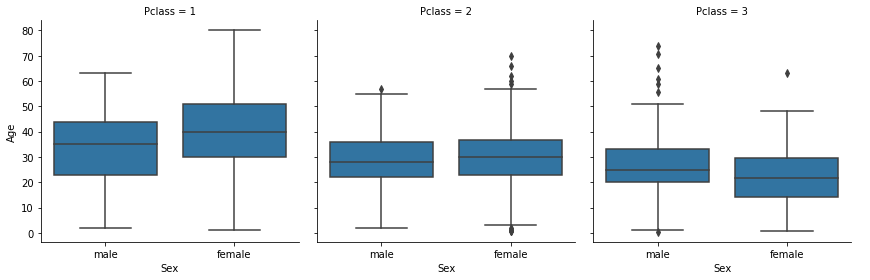

In [12]:
#Grid is 1X3 with only pclass as columns.
g = sns.FacetGrid(df,col='Pclass',size=4)
g.map(sns.boxplot, 'Sex', 'Age')
g.add_legend()

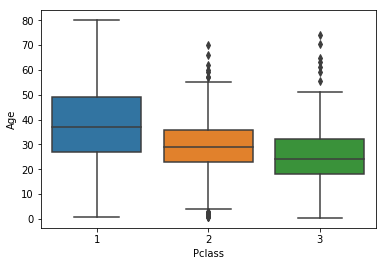

In [13]:
#The non grid method of making boxplots is shown below, which is much more colorful by default!
ax = sns.boxplot(x="Pclass", y="Age", data=df)

## 3.6 Density Distribution

Box plots are great but a lot of people like to plot the actual scatter of points over them for better understanding of density. This is solved by a Violin plot.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use sns.violinplot along with the variables you want to view. In this case, the box plot is that of Age variation, but the variable it is compared against is the gender. So x is age while y is gender.

Hue doesn't work in the normal way here as well. Finding a workaround.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


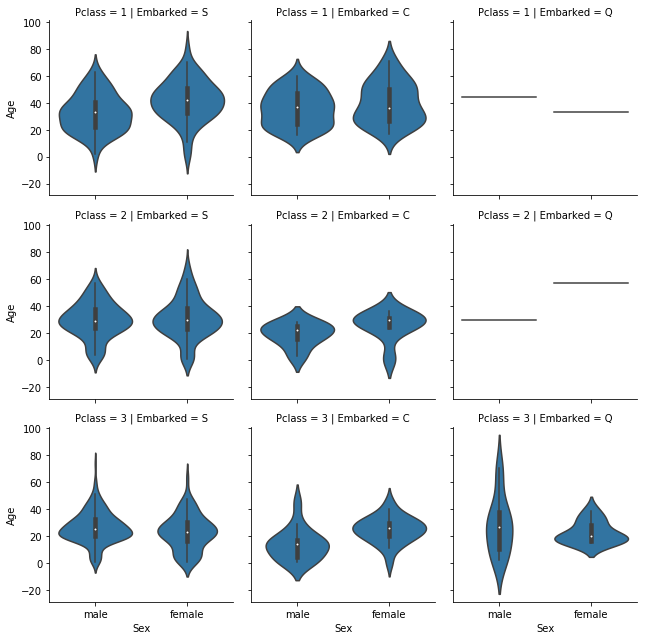

In [14]:
#Grid is 3X3 with no hue variable
g = sns.FacetGrid(df,row='Pclass',col='Embarked',size=3)
g.map(sns.violinplot, 'Sex', 'Age')
g.add_legend()

## 3.7 Line Charts

These are limitless in usage. They can be used to understand series data really efficiently and can let you view relationships between 2 or more series if they are stacked over one another.

1. Create FacetGrid with dataframe, rows, columns and depth.
2. Use sns.kdeplot along with the variables you want to view. Hue here can act as a variable used to split the series data by category.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


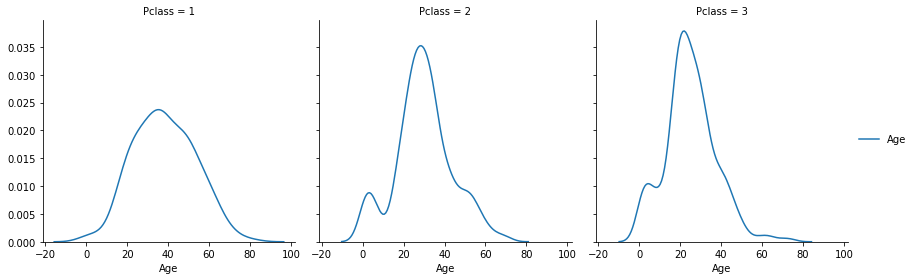

In [15]:
#Simple 1X3 grid of line charts without a Hue variable
g = sns.FacetGrid(df,col='Pclass',size=4)
g.map(sns.kdeplot, 'Age')
g.add_legend()

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


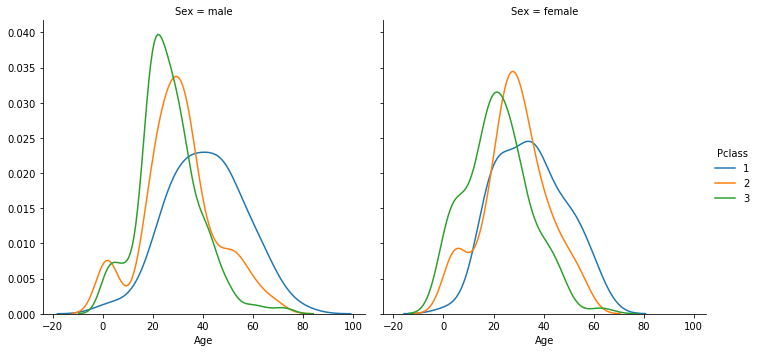

In [16]:
#Grid is 1X2 with only gender levels on columns. Hue is pclass which creates a really cool visualization.
g = sns.FacetGrid(df,col='Sex',hue='Pclass',size=5)
g.map(sns.kdeplot, 'Age')
g.add_legend()

## 3.8 Correlation matrix

This is a second category of charts which lie outside the FacetGrid approach. They require a list of variables (minimum 2) which need to be plotted as well as a hue variable for depth (optional). Just make sure no values are NaN, else it throws and error.

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


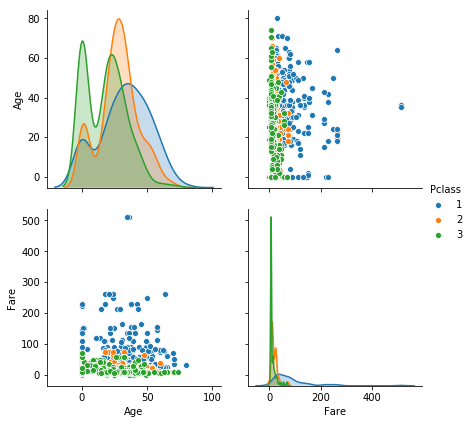

In [17]:
# Hue needs to be a categorical variables else it displays it as a variable on the diagram
sns.pairplot(df.fillna(0), vars=['Age','Fare'] , hue="Pclass", size=3)

C:\Users\Shakib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


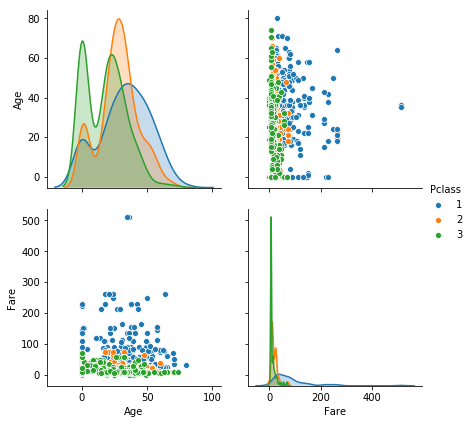

In [18]:
#Another minor variation over the pairplot
sns.pairplot(df.fillna(0), vars=['Age','Fare'] , hue="Pclass", size=3, diag_kind="kde")

# 4. Graph Components

This section will deal with adding overlays to the above graphs to edit or add more information to the graphs

WORK IN PROGRESS!

# References
<ul>
<li>https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations
</li><li>http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
</li><li>http://seaborn.pydata.org/tutorial/axis_grids.html
</li></ul>